# Assignment

- Create and copy this file in folder `BME11`, name your new file's name as your group number (ex: group1.ipynb)
- Visualize data from `datasets/2019_nCoV_data.csv`

2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people - CDC

This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus.

The data is available from 22 Jan 2020.

source: [kaggle](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset)

## 0. Group Members
Yonlada Naiwlaijaroen (Mai) 6113088
Siraphat Siraweroj (pao) 6113241
Siwakorn Teangda (shop) 6113166



## 1. Read coronavirus data from `2019_nCoV_data.csv`

In [65]:
from os import path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score
import seaborn as sns
color = sns.color_palette()
sns.set()

In [66]:
def dp(dataFileName):
    '''
    This function is used to get full data path (dp) from data file name.
    '''
    return path.join('datasets', dataFileName)

In [67]:
fileName = '2019_nCoV_data.csv' 
corona_virus = pd.read_csv(dp(fileName), encoding='utf-8')

## 2. Show dataframe

In [68]:
corona_virus 

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
765,766,02/04/2020 22:00:00,"Boston, MA",US,2020-01-02 19:43:00,1.0,0.0,0.0
766,767,02/04/2020 22:00:00,"Los Angeles, CA",US,2020-01-02 19:53:00,1.0,0.0,0.0
767,768,02/04/2020 22:00:00,"Orange, CA",US,2020-01-02 19:53:00,1.0,0.0,0.0
768,769,02/04/2020 22:00:00,"Seattle, WA",US,2020-01-02 19:43:00,1.0,0.0,0.0


## 3. Show which countries that affected by the virus and how many cases have been reported

In [89]:
virus=corona_virus.drop(['Sno', 'Date', 'Last Update'], axis=1).groupby('Country').max().sort_values(by=['Confirmed'],ascending=False)
virus

,Confirmed,Deaths,Recovered
Country,,,
Mainland China,16678.0,479.0,522.0
China,444.0,0.0,0.0
Thailand,25.0,0.0,7.0
Singapore,24.0,0.0,0.0
Japan,22.0,0.0,1.0
Hong Kong,18.0,1.0,0.0
South Korea,16.0,0.0,0.0
Germany,12.0,0.0,0.0
Taiwan,11.0,0.0,0.0


## 4. Show and visualize total number of confirmed, deaths & recovered cases in each countries and sort it by amount of confirmed cases

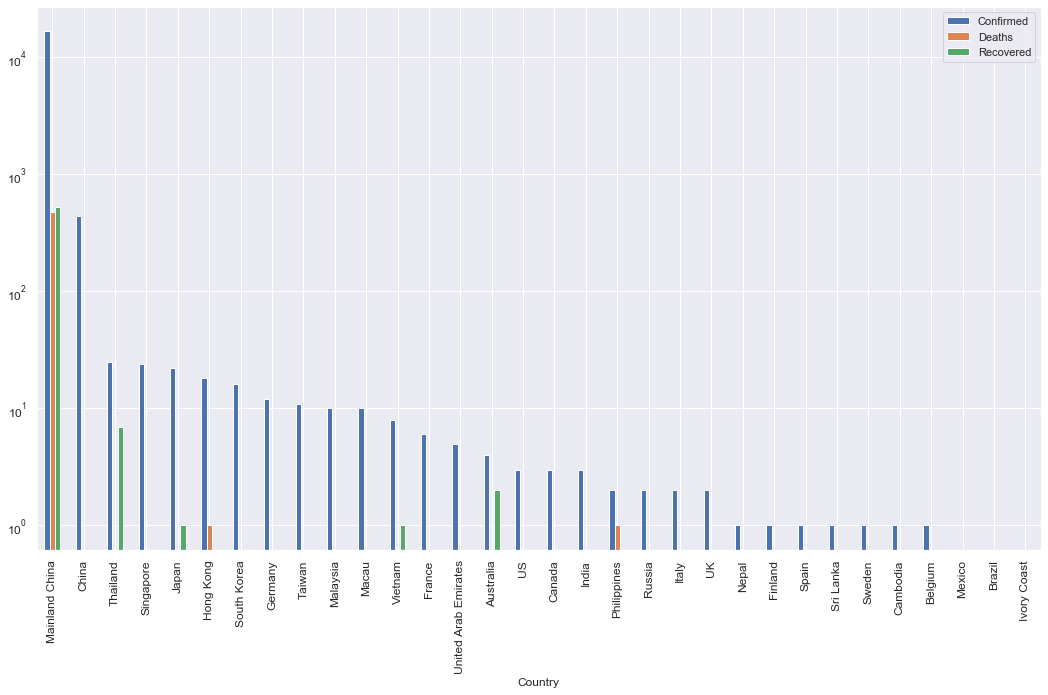

In [95]:
virus.plot(kind='bar',figsize=(18,10), fontsize=12,logy=True)

## 5. Show and visualize global spread of the coronavirus cases over time 

In [103]:
update=corona_virus.drop(['Sno', 'Country', 'Last Update'], axis=1).groupby('Date').max().sort_values(by=['Date'],ascending=True)
update

,Confirmed,Deaths,Recovered
Date,,,
01/22/2020 12:00:00,444.0,0.0,0.0
01/23/2020 12:00:00,444.0,17.0,28.0
01/24/2020 12:00:00,549.0,24.0,31.0
01/25/2020 22:00:00,1052.0,52.0,42.0
01/26/2020 23:00:00,1423.0,76.0,44.0
01/27/2020 20:30:00,2714.0,100.0,47.0
01/28/2020 23:00:00,3554.0,125.0,80.0
01/29/2020 21:00:00,4586.0,162.0,90.0
01/30/2020 21:30:00,5806.0,204.0,116.0


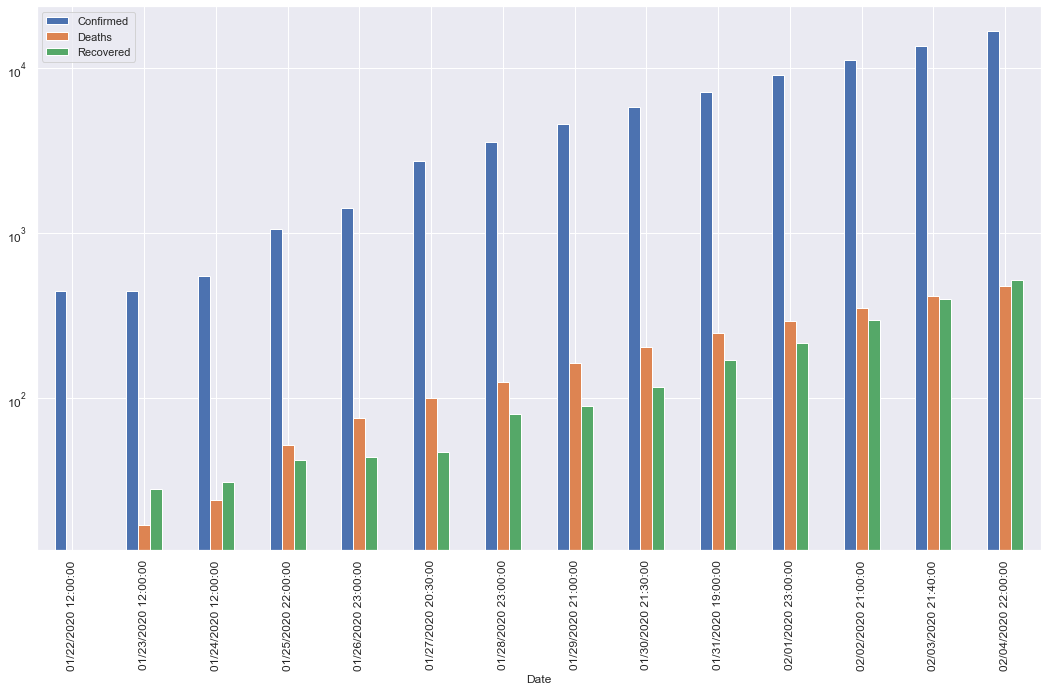

In [104]:
update.plot(kind='bar',figsize=(18,10), fontsize=12,logy=True)

## 6. Show relation between confirmed cases and deaths case in linear regression

In [105]:
relation=corona_virus.drop(['Sno', 'Country','Date','Recovered', 'Last Update'], axis=1).groupby('Confirmed').max().sort_values(by=['Confirmed'],ascending=True)
relation

,Deaths
Confirmed,
0.0,0.0
1.0,1.0
2.0,1.0
3.0,0.0
4.0,1.0
...,...
7153.0,249.0
9074.0,294.0
11177.0,350.0


In [126]:
x = corona_virus['Confirmed']
y = corona_virus['Deaths']
p = np.poly1d(np.polyfit(x,y,2))

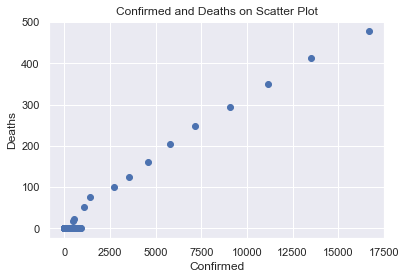

In [127]:
plt.xlabel('Confirmed')
plt.ylabel('Deaths')
plt.title('Confirmed and Deaths on Scatter Plot')
plt.scatter(x,y)
plt.show()

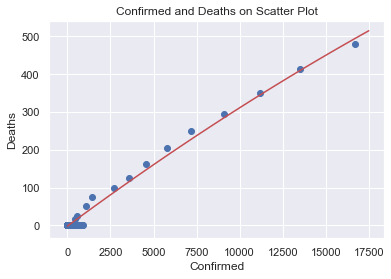

In [128]:
plt.xlabel('Confirmed')
plt.ylabel('Deaths')
plt.title('Confirmed and Deaths on Scatter Plot')

xp = np.linspace(0, 17500, 100)
plt.plot(xp,p(xp),c = 'r')
plt.scatter(x,y)
plt.show()

In [129]:
r2_train = r2_score(y, p(x))
print('The rsquared value is: ' + str(r2_train))

The rsquared value is: 0.9789773705125404


## 7. Show dependence between confirmed cases and recovered case in linear regression

In [117]:
relation=corona_virus.drop(['Sno', 'Country','Date','Deaths', 'Last Update'], axis=1).groupby('Confirmed').max().sort_values(by=['Confirmed'],ascending=True)
relation

,Recovered
Confirmed,
0.0,0.0
1.0,0.0
2.0,0.0
3.0,0.0
4.0,2.0
...,...
7153.0,169.0
9074.0,215.0
11177.0,295.0


In [122]:
x = corona_virus['Confirmed']
y = corona_virus['Recovered']
p = np.poly1d(np.polyfit(x,y,2))

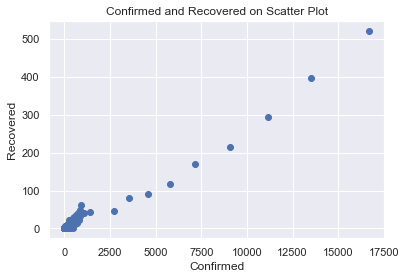

In [123]:
plt.xlabel('Confirmed')
plt.ylabel('Recovered')
plt.title('Confirmed and Recovered on Scatter Plot')
plt.scatter(x,y)
plt.show()

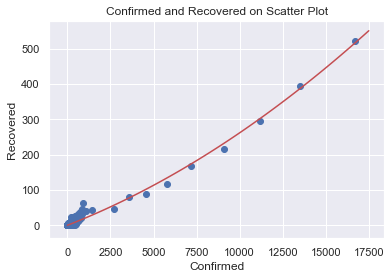

In [124]:
plt.xlabel('Confirmed')
plt.ylabel('Recovered')
plt.title('Confirmed and Recovered on Scatter Plot')

xp = np.linspace(0, 17500, 100)
plt.plot(xp,p(xp),c = 'r')
plt.scatter(x,y)
plt.show()

In [125]:
r2_train = r2_score(y, p(x))
print('The rsquared value is: ' + str(r2_train))

The rsquared value is: 0.9833766386710274
